# IMPROVING THE CIFAR-10 MODEL WITH DATA AUGMENTATION

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images.

- Augmentations also include shifting and changing the brightness of the images.

## DATA AUGMENTATION FOR THE CIFAR-10 DATASET

In [1]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [2]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
n = 8
X_train_sample = X_train[:n]

In [5]:
X_train_sample.shape

(8, 32, 32, 3)

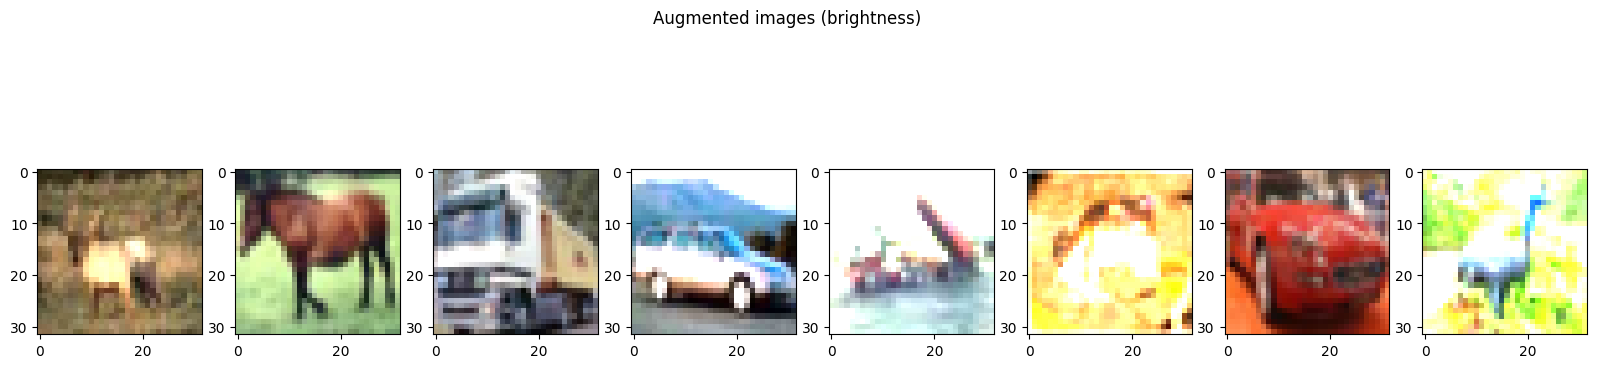

In [6]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already loaded X_train_sample and defined n

datagen_train = ImageDataGenerator(brightness_range=(1, 3))

datagen_train.fit(X_train_sample)

fig = plt.figure(figsize=(20, 5))

# Generate augmented images and display
for x_batch in datagen_train.flow(X_train_sample, batch_size=n):
    for i in range(n):
        ax = fig.add_subplot(1, n, i+1)
        ax.imshow(np.uint8(x_batch[i]))
    fig.suptitle('Augmented images (brightness)')
    plt.show()
    break


## MODEL TRAINING USING AUGEMENTED DATASET

In [7]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [8]:
datagen.fit(X_train)

In [15]:
cnn_model.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 641728192.0000 - accuracy: 0.0000e+00
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1234500480.0000 - accuracy: 0.0000e+00
Epoch 3/10
1563/1563 [==============================] - 38s 25ms/step - loss: 466263488.0000 - accuracy: 0.0063
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 291168992.0000 - accuracy: 0.0313
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 367563392.0000 - accuracy: 0.0474
Epoch 6/10
1563/1563 [==============================] - 43s 28ms/step - loss: 435325888.0000 - accuracy: 0.0593
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 521010432.0000 - accuracy: 0.0664
Epoch 8/10
1563/1563 [==============================] - 38s 24ms/step - loss: 590030272.0000 - accuracy: 0.0751
Epoch 9/10
1563/1563 [==============================] - 43s 27ms/step - loss: 635375040.0000 - 

In [18]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

# Display model summary
cnn_model.summary()

# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the model with data augmentation
batch_size = 32
epochs = 10
steps_per_epoch = len(X_train) // batch_size

history = cnn_model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=(X_test, y_test)
)

# Evaluate the model
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 128)       